In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from Graph import *
from Azimuth import *
from Grid import *
import pickle

In [3]:
df = pd.read_csv("presets/0.csv")

In [4]:
tra0 = df["trajectory"].unique()[0]
dft0 = df[df["trajectory"] == tra0]

tra1 = df["trajectory"].unique()[1]
dft1 = df[df["trajectory"] == tra1]

dft01 = df[df["trajectory"].isin([tra0, tra1])]

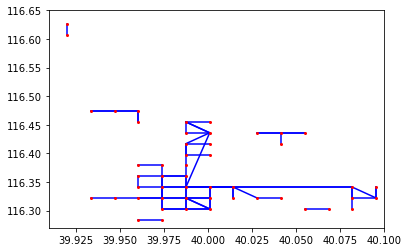

In [11]:
#graph_0 = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_0 = pickle.load(open("random_graph_3", "rb"))

for edge in graph_0.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([39.910, 40.1])
plt.ylim([116.27, 116.65])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/grid_very_short.png")

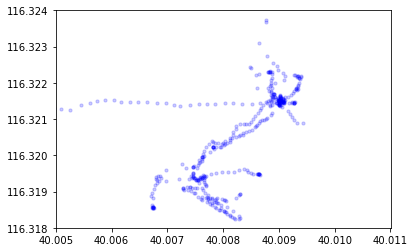

In [5]:
plt.scatter(dft0.latitude, dft0.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/points0.png")

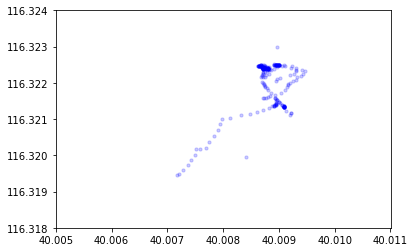

In [6]:
plt.scatter(dft1.latitude, dft1.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/points1.png")

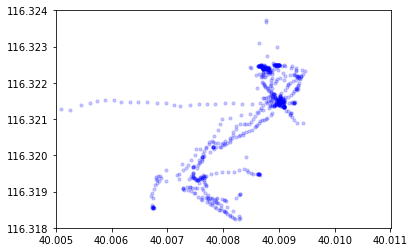

In [7]:
plt.scatter(dft01.latitude, dft01.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/points01.png")

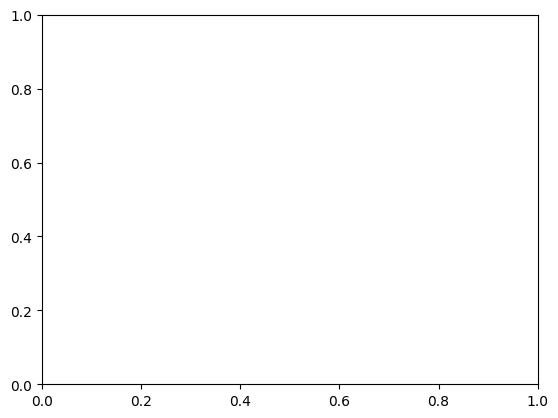

In [8]:
#graph_1 = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1 = graph_0 = pickle.load(open("random_graph_t1", "rb"))

for edge in graph_1.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_1.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

# plt.xlim([40.005, 40.011])
# plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/grid_1.png")

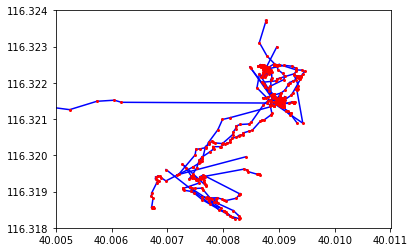

In [10]:
graph_0_a = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1_a = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_0_a.combine_graph(graph_1_a)

for edge in graph_0_a.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0_a.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/azimuth01.png")

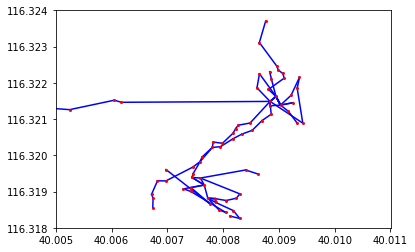

In [11]:
graph_0_f = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_0_f.simplify_double_edges()
graph_0_f.delete_chain_vertices()
graph_0_f.merge_close_vertices()
graph_0_f.merge_vertices_to_edges()
garbage_collection()

for edge in graph_0_f.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0_f.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/merge0.png")

In [9]:
# graph_1_f = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1_f = pickle.load(open("random_graph_3", "rb"))

graph_1_f.simplify_double_edges()
graph_1_f.delete_chain_vertices()
graph_1_f.merge_close_vertices()
graph_1_f.merge_vertices_to_edges()
garbage_collection()

for edge in graph_1_f.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_1_f.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

# plt.xlim([40.005, 40.011])
# plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/grid_very_short_simplified.png")

KeyError: <Edge>

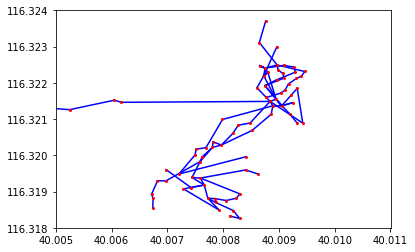

In [13]:
graph_0_a_f = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1_a_f = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_0_a_f.simplify_double_edges()
graph_0_a_f.delete_chain_vertices()
graph_0_a_f.merge_close_vertices()

graph_1_a_f.simplify_double_edges()
graph_1_a_f.delete_chain_vertices()
graph_1_a_f.merge_close_vertices()

graph_0_a_f.combine_graph(graph_1_a)

graph_0_a_f.simplify_double_edges()
graph_0_a_f.delete_chain_vertices()
graph_0_a_f.merge_close_vertices()
graph_0_a_f.merge_vertices_to_edges()
garbage_collection()

for edge in graph_0_a_f.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0_a_f.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/merge01.png")

In [14]:
tra2 = df["trajectory"].unique()[11]
dft2 = df[df["trajectory"] == tra2]

dft012 = df[df["trajectory"].isin([tra0, tra1, tra2])]

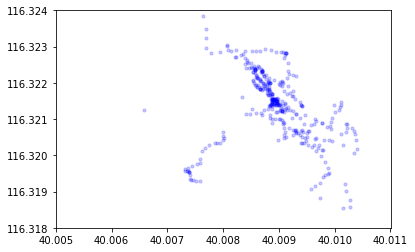

In [15]:
plt.scatter(dft2.latitude, dft2.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures\points2.png")

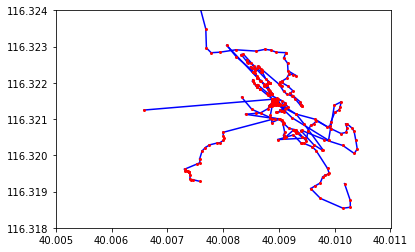

In [16]:
graph_2 = create_azimuth_graph(dft2, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

for edge in graph_2.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_2.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/azimuth2.png")

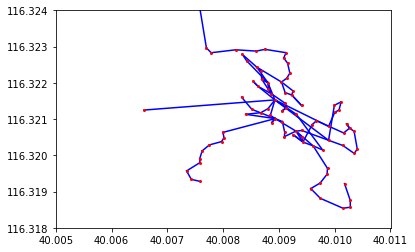

In [17]:
graph_2_f = create_azimuth_graph(dft2, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_2_f.simplify_double_edges()
graph_2_f.delete_chain_vertices()
graph_2_f.merge_close_vertices()
graph_2_f.merge_vertices_to_edges()
garbage_collection()

for edge in graph_2_f.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_2_f.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/merge2.png")

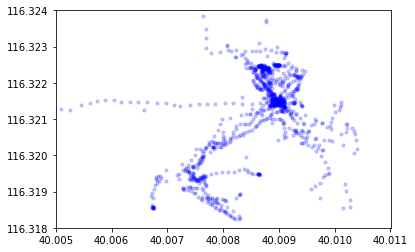

In [18]:
plt.scatter(dft012.latitude, dft012.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures\points012.png")

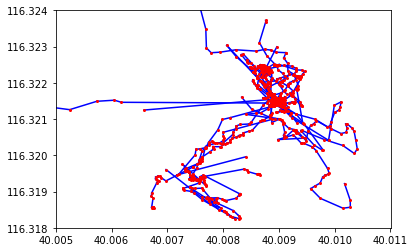

In [19]:
graph_0_a = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1_a = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_2_a = create_azimuth_graph(dft2, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_2_a.combine_graph(graph_0_a)
graph_2_a.combine_graph(graph_1_a)

for edge in graph_2_a.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_2_a.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/azimuth012.png")

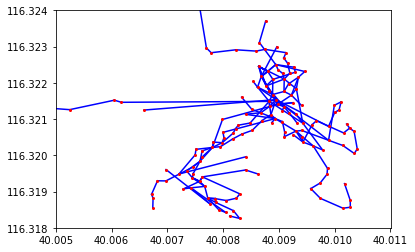

In [20]:
graph_0_a_f = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1_a_f = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_2_a_f = create_azimuth_graph(dft2, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_0_a_f = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1_a_f = create_azimuth_graph(dft1, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_0_a_f.simplify_double_edges()
graph_0_a_f.delete_chain_vertices()
graph_0_a_f.merge_close_vertices()

graph_1_a_f.simplify_double_edges()
graph_1_a_f.delete_chain_vertices()
graph_1_a_f.merge_close_vertices()

graph_2_a_f.simplify_double_edges()
graph_2_a_f.delete_chain_vertices()
graph_2_a_f.merge_close_vertices()

graph_2_a_f.combine_graph(graph_0_a)
graph_2_a_f.combine_graph(graph_1_a)

graph_2_a_f.simplify_double_edges()
graph_2_a_f.delete_chain_vertices()
graph_2_a_f.merge_close_vertices()
graph_2_a_f.merge_vertices_to_edges()
garbage_collection()

for edge in graph_2_a_f.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_2_a_f.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([40.005, 40.011])
plt.ylim([116.318, 116.324])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/merge012.png")

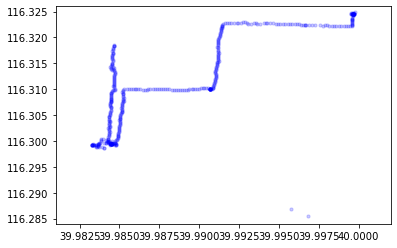

In [21]:
plt.scatter(dft0.latitude, dft0.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([39.981, 40.002])
plt.ylim([116.284, 116.326])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/points0_p.png")

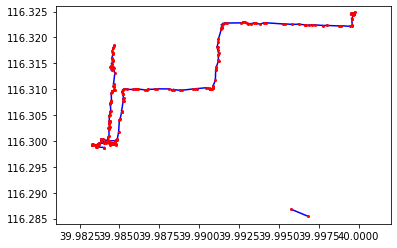

In [22]:
graph_0 = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

for edge in graph_0.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([39.981, 40.002])
plt.ylim([116.284, 116.326])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/azimuth0_p.png")

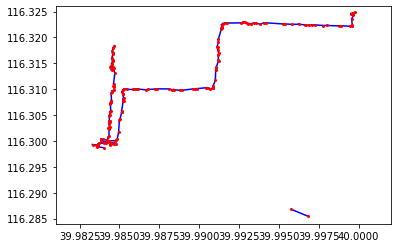

In [23]:
graph_0_f = create_azimuth_graph(dft0, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

graph_0_f.merge_close_vertices()
graph_0_f.merge_vertices_to_edges()
garbage_collection()

for edge in graph_0_f.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0_f.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([39.981, 40.002])
plt.ylim([116.284, 116.326])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/merge0_p.png")

In [24]:
for i in [1,2,3,4]:
    for j in [1,2]:
        graph_0 = create_azimuth_graph(dft0, method = i, splitting_method = j, max_angle_change = 15, max_angle_change_min = 5)

        for edge in graph_0.edges:
            lat1 = min(edge.vertices).latitude
            long1 = min(edge.vertices).longitude

            lat2 = max(edge.vertices).latitude
            long2 = max(edge.vertices).longitude

            plt.plot([lat1, lat2], [long1, long2], color = "blue")

        for vertex in graph_0.vertices:
            lat = vertex.latitude
            long = vertex.longitude

            plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

        plt.xlim([39.981, 40.002])
        plt.ylim([116.284, 116.326])
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.savefig(f"pictures/set1/azimuth0_M{i}{j}.png")
        plt.clf()

<Figure size 432x288 with 0 Axes>

In [25]:
graph_0 = create_azimuth_graph(dft0, method = 4, splitting_method = 2, max_angle_change = 15, max_angle_change_min = 5)

for edge in graph_0.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([39.981, 40.002])
plt.ylim([116.284, 116.326])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig(f"pictures/azimuth0f.png")
plt.clf()

<Figure size 432x288 with 0 Axes>

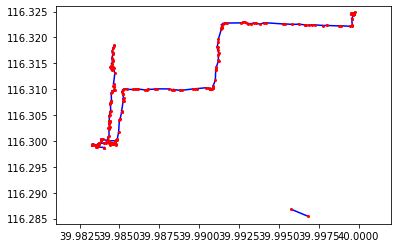

In [26]:
graph_0 = create_azimuth_graph(dft0, method = 4, splitting_method = 2, max_angle_change = 15, max_angle_change_min = 5)

for edge in graph_0.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([39.981, 40.002])
plt.ylim([116.284, 116.326])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig(f"pictures/azimuth0mc.png")

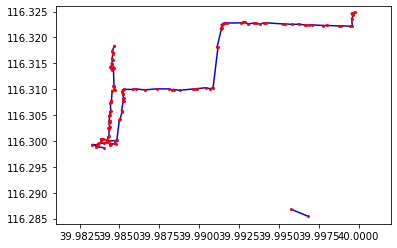

In [27]:
graph_0 = create_azimuth_graph(dft0, method = 4, splitting_method = 2, max_angle_change = 15, max_angle_change_min = 5)

graph_0.simplify_double_edges()
graph_0.delete_chain_vertices(threshold = 15)
graph_0.merge_close_vertices()
graph_0.merge_vertices_to_edges()
garbage_collection()

for edge in graph_0.edges:
    lat1 = min(edge.vertices).latitude
    long1 = min(edge.vertices).longitude

    lat2 = max(edge.vertices).latitude
    long2 = max(edge.vertices).longitude

    plt.plot([lat1, lat2], [long1, long2], color = "blue")

for vertex in graph_0.vertices:
    lat = vertex.latitude
    long = vertex.longitude

    plt.plot(lat, long, color = "red", marker = "o", markersize = 2)

plt.xlim([39.981, 40.002])
plt.ylim([116.284, 116.326])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig(f"pictures/merge0mc.png")

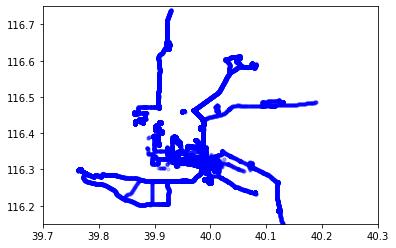

In [23]:
plt.scatter(df.latitude, df.longitude, zorder=1, alpha= 0.2, c='b', s=10)
plt.xlim([39.70, 40.30])
plt.ylim([116.15, 116.75])
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig("pictures/set2/pointsU0.png")